# 1 - The Model


**1.1** Before anything we need to import our data that was previously treated, we import it in a pickle file, after that we normalize all the pixels dividing every pixel by the maximum value of 255.

In [ ]:
import pickle
import numpy as np

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

y = np.array(y)
print("Before normalization")
print(X[0])
X = X/255.0 #normalize the array of images

print("After")
print(X[0])

print(len(X),len(y))

Before normalization
[[123  87 133 ... 159 178 192]
 [112 106 130 ... 192 171 193]
 [104 114 131 ... 204 178 185]
 ...
 [144 141 145 ... 137 130 108]
 [145 155 159 ...  92  80  61]
 [152 149 150 ...  74 155  68]]
After
[[0.48235294 0.34117647 0.52156863 ... 0.62352941 0.69803922 0.75294118]
 [0.43921569 0.41568627 0.50980392 ... 0.75294118 0.67058824 0.75686275]
 [0.40784314 0.44705882 0.51372549 ... 0.8        0.69803922 0.7254902 ]
 ...
 [0.56470588 0.55294118 0.56862745 ... 0.5372549  0.50980392 0.42352941]
 [0.56862745 0.60784314 0.62352941 ... 0.36078431 0.31372549 0.23921569]
 [0.59607843 0.58431373 0.58823529 ... 0.29019608 0.60784314 0.26666667]]
19963 19963


**1.2** On this section we work with our first model, we developed a inchoate model only to see how a rudimentary model will perform with an image dataset. As we can see bellow, this simples model barely cross the 50% precision line.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation

model = Sequential()

model.add (Dense (64,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

fisrt_model = model.fit(X,y,batch_size=1, epochs=1, validation_split=0.1)
# after 5 epochs plateau

17966/17966 [==============================] - 70s 4ms/step - loss: 0.7774 - accuracy: 0.5022 - val_loss: 0.6931 - val_accuracy: 0.5033


In [ ]:
fisrt_model = model.fit(X,y,batch_size=1, epochs=1, validation_split=0.1)

17966/17966 [==============================] - 76s 4ms/step - loss: 0.6932 - accuracy: 0.5057 - val_loss: 0.6936 - val_accuracy: 0.4967


**1.3** Let's see how our rudementary model will peform after each epoch.

Epoch 1/5
999/999 [==============================] - 8s 8ms/step - loss: 0.6932 - accuracy: 0.4961 - val_loss: 0.6932 - val_accuracy: 0.4926
Epoch 2/5
999/999 [==============================] - 7s 7ms/step - loss: 0.6932 - accuracy: 0.4943 - val_loss: 0.6932 - val_accuracy: 0.4926
Epoch 3/5
999/999 [==============================] - 7s 7ms/step - loss: 0.6932 - accuracy: 0.5029 - val_loss: 0.6931 - val_accuracy: 0.5074
Epoch 4/5
999/999 [==============================] - 7s 7ms/step - loss: 0.6932 - accuracy: 0.4994 - val_loss: 0.6931 - val_accuracy: 0.5074
Epoch 5/5
999/999 [==============================] - 7s 7ms/step - loss: 0.6932 - accuracy: 0.5002 - val_loss: 0.6932 - val_accuracy: 0.4926
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


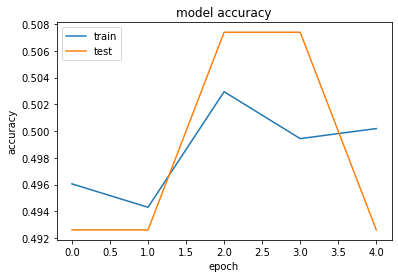

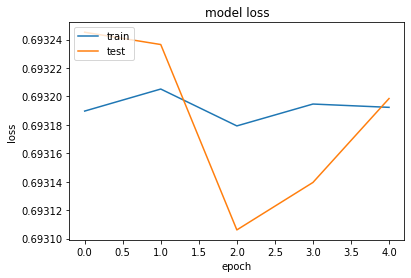

In [ ]:
history = model.fit(X,y,batch_size=16, epochs=5, validation_split=0.2)

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 2 - Improving the Model

**2.1** What if we overboost our model? 

Let's configure the capacity of layer and nodes, let's change our batch size, and set a loss function that was already been proven to be the best one for a binary classification problem and add activation functions on every layer, to see how it will perform?

Epoch 1/20
281/281 [==============================] - 53s 186ms/step - loss: 0.6994 - accuracy: 0.5365 - val_loss: 0.6847 - val_accuracy: 0.5577
Epoch 2/20
281/281 [==============================] - 66s 234ms/step - loss: 0.6845 - accuracy: 0.5549 - val_loss: 0.6796 - val_accuracy: 0.5726
Epoch 3/20
281/281 [==============================] - 52s 186ms/step - loss: 0.6798 - accuracy: 0.5684 - val_loss: 0.6774 - val_accuracy: 0.5790
Epoch 4/20
281/281 [==============================] - 52s 186ms/step - loss: 0.6798 - accuracy: 0.5685 - val_loss: 0.6786 - val_accuracy: 0.5706
Epoch 5/20
281/281 [==============================] - 52s 187ms/step - loss: 0.6770 - accuracy: 0.5738 - val_loss: 0.6759 - val_accuracy: 0.5813
Epoch 6/20
281/281 [==============================] - 52s 186ms/step - loss: 0.6769 - accuracy: 0.5746 - val_loss: 0.6764 - val_accuracy: 0.5708
Epoch 7/20
281/281 [==============================] - 53s 187ms/step - loss: 0.6753 - accuracy: 0.5767 - val_loss: 0.6742 - val_ac

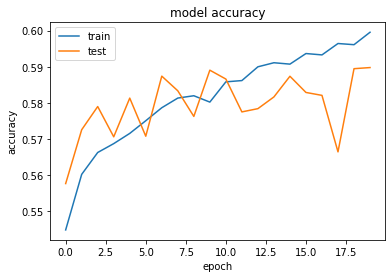

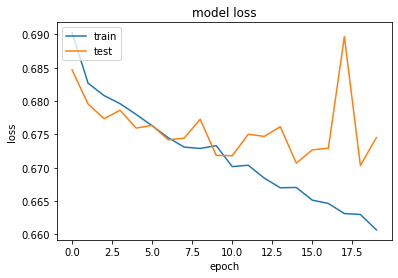

In [ ]:
modelnew = Sequential()

modelnew.add (Dense (320,activation='relu',kernel_initializer='he_uniform'))

modelnew.add (Dense (320,activation='relu',kernel_initializer='he_uniform'))

modelnew.add (Dense (320,activation='relu',kernel_initializer='he_uniform'))

modelnew.add(Dense(1,activation = 'sigmoid'))

modelnew.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = modelnew.fit(X,y,batch_size=64, epochs=20, validation_split=0.1)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

We can see that our results improved in a good margin, but is our model good or is it just overfitting?

# 3 - Better Generalization

**3.1** Let's implement a Dropout with 10% of chance to happen, to see how our model will work with this technique, also we decrease the amount of nodes in each layer.

In [ ]:
modelnew = Sequential()

modelnew.add (Dense (64,activation='relu',kernel_initializer='he_uniform'))
modelnew.add(Dropout(0.1))
modelnew.add (Dense (64,activation='relu',kernel_initializer='he_uniform'))
modelnew.add(Dropout(0.1))
modelnew.add (Dense (64,activation='relu',kernel_initializer='he_uniform'))
modelnew.add(Dropout(0.1))
modelnew.add(Dense(1,activation = 'sigmoid'))

modelnew.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = modelnew.fit(X,y,batch_size=32, epochs=5, validation_split=0.1)

Epoch 1/5
562/562 [==============================] - 12s 20ms/step - loss: 0.6978 - accuracy: 0.5248 - val_loss: 0.6871 - val_accuracy: 0.5528
Epoch 2/5
562/562 [==============================] - 11s 19ms/step - loss: 0.6880 - accuracy: 0.5451 - val_loss: 0.6847 - val_accuracy: 0.5583
Epoch 3/5
562/562 [==============================] - 12s 21ms/step - loss: 0.6849 - accuracy: 0.5547 - val_loss: 0.6815 - val_accuracy: 0.5633
Epoch 4/5
562/562 [==============================] - 11s 19ms/step - loss: 0.6838 - accuracy: 0.5591 - val_loss: 0.6818 - val_accuracy: 0.5626
Epoch 5/5
562/562 [==============================] - 11s 19ms/step - loss: 0.6832 - accuracy: 0.5600 - val_loss: 0.6807 - val_accuracy: 0.5724


In [ ]:
# import norm
from keras.constraints import max_norm
# instantiate norm
norm = max_norm(3.0)

**3.2** Forgetting the dropout for a moment let's try setting weights constraits to our model.

In [ ]:
modelnew = Sequential()

modelnew.add (Dense (64,activation='relu',kernel_initializer='he_uniform',kernel_constraint=max_norm(3), bias_constraint=max_norm(3)))
#modelnew.add(Dropout(0.1))
modelnew.add (Dense (64,activation='relu',kernel_initializer='he_uniform',kernel_constraint=max_norm(3), bias_constraint=max_norm(3)))
#modelnew.add(Dropout(0.1))
modelnew.add (Dense (64,activation='relu',kernel_initializer='he_uniform',kernel_constraint=max_norm(3), bias_constraint=max_norm(3)))
#modelnew.add(Dropout(0.1))
modelnew.add(Dense(1,activation = 'sigmoid'))

modelnew.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = modelnew.fit(X,y,batch_size=32, epochs=10, validation_split=0.1)

Epoch 1/10
562/562 [==============================] - 10s 16ms/step - loss: 0.6965 - accuracy: 0.5264 - val_loss: 0.6868 - val_accuracy: 0.5492
Epoch 2/10
562/562 [==============================] - 8s 14ms/step - loss: 0.6851 - accuracy: 0.5558 - val_loss: 0.6849 - val_accuracy: 0.5591
Epoch 3/10
562/562 [==============================] - 8s 13ms/step - loss: 0.6851 - accuracy: 0.5509 - val_loss: 0.6822 - val_accuracy: 0.5634
Epoch 4/10
562/562 [==============================] - 7s 13ms/step - loss: 0.6825 - accuracy: 0.5614 - val_loss: 0.6811 - val_accuracy: 0.5678
Epoch 5/10
562/562 [==============================] - 8s 13ms/step - loss: 0.6830 - accuracy: 0.5601 - val_loss: 0.6836 - val_accuracy: 0.5634
Epoch 6/10
562/562 [==============================] - 8s 13ms/step - loss: 0.6808 - accuracy: 0.5653 - val_loss: 0.6839 - val_accuracy: 0.5591
Epoch 7/10
562/562 [==============================] - 8s 13ms/step - loss: 0.6808 - accuracy: 0.5652 - val_loss: 0.6871 - val_accuracy: 0.546

**3.3** The junction of both tecniques above will be implemented in our final model.

In [ ]:
modelnew = Sequential()

modelnew.add (Dense (64,activation='relu',kernel_initializer='he_uniform',kernel_constraint=max_norm(3), bias_constraint=max_norm(3)))
modelnew.add(Dropout(0.1))
modelnew.add (Dense (64,activation='relu',kernel_initializer='he_uniform',kernel_constraint=max_norm(3), bias_constraint=max_norm(3)))
modelnew.add(Dropout(0.1))
modelnew.add (Dense (64,activation='relu',kernel_initializer='he_uniform',kernel_constraint=max_norm(3), bias_constraint=max_norm(3)))
modelnew.add(Dropout(0.1))
modelnew.add(Dense(1,activation = 'sigmoid'))

modelnew.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = modelnew.fit(X,y,batch_size=32, epochs=10, validation_split=0.1)

Epoch 1/10
562/562 [==============================] - 13s 20ms/step - loss: 0.6940 - accuracy: 0.5224 - val_loss: 0.6860 - val_accuracy: 0.5519
Epoch 2/10
562/562 [==============================] - 11s 20ms/step - loss: 0.6865 - accuracy: 0.5484 - val_loss: 0.6850 - val_accuracy: 0.5552
Epoch 3/10
562/562 [==============================] - 11s 19ms/step - loss: 0.6850 - accuracy: 0.5545 - val_loss: 0.6820 - val_accuracy: 0.5646
Epoch 4/10
562/562 [==============================] - 11s 19ms/step - loss: 0.6829 - accuracy: 0.5612 - val_loss: 0.6830 - val_accuracy: 0.5538
Epoch 5/10
562/562 [==============================] - 11s 20ms/step - loss: 0.6835 - accuracy: 0.5598 - val_loss: 0.6791 - val_accuracy: 0.5765
Epoch 6/10
562/562 [==============================] - 11s 20ms/step - loss: 0.6809 - accuracy: 0.5657 - val_loss: 0.6805 - val_accuracy: 0.5650
Epoch 7/10
562/562 [==============================] - 11s 20ms/step - loss: 0.6798 - accuracy: 0.5691 - val_loss: 0.6774 - val_accuracy:

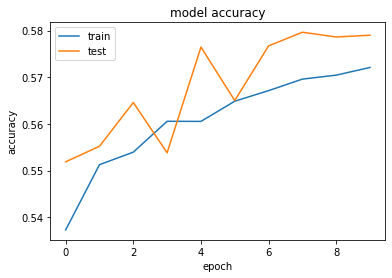

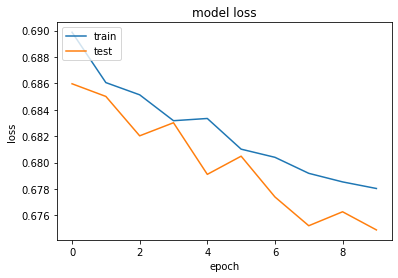

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 4 - Results 

**4.1** We saw that at the beginning that our model when was implemented in a poorly way, the results barely pass the line of 50%. After testing and experimenting new trhings to our model we achived a val_loss: 0.6749 and val_accuracy: 0.5790.

That is not the ideal but, we are working with images without implementing a convolutional neural network (CNN), so at the beginning of this project i was aiming in a acurracy of 60%.


We did not reach our goal, but we got pretty close, so, i'm satisfied with the implementation of our model without CNN to predict if the image shows a Cat or a Dog.